# ACO - Travelling Salesman

In [1]:
using StatsBase;
using ProgressBars;
using Plots;

In [2]:
function dist2(x1, y1, x2, y2)
    return ((x1 - x2) ^ 2 + (y1 - y2) ^ 2) ^ 0.5
end

dist2 (generic function with 1 method)

In [3]:
struct Graph
    n::Int64
    x::Vector{Float64}
    y::Vector{Float64}
    edges::Array{Float64, 2}
    
    function Graph(x, y)
        n = size(x)[1]
        edges = Array{Float64, 2}(undef, n, n)
        for i in 1:n
            for j in 1:n
                edges[i,j] = dist2(x[i],y[i],x[j],y[j])
            end
        end
        return new(n, x, y, edges)
    end
end

In [4]:
function get_xy(ix)
    data = [
        (
            [0.09, 0.16, 0.84, 0.7], 
            [0.17, 0.52, 0.92, 0.16]
        ), (
            [16.47, 16.47, 20.09, 22.39, 25.23, 22.0, 20.47, 17.2, 16.3, 14.05, 16.53, 21.52, 19.41, 20.09], 
            [96.1, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]
        ), (
            [7.0, 9.0, 2.0, 0.0, 0.0, 1.0, 7.0, 1.0, 2.0, 51.0, 42.0, 31.0, 5.0, 12.0, 36.0, 52.0, 27.0, 17.0, 13.0, 57.0, 62.0, 42.0, 16.0, 8.0, 7.0, 27.0, 30.0, 43.0, 58.0, 58.0, 37.0, 38.0, 46.0, 61.0, 62.0, 63.0, 32.0, 45.0, 59.0, 5.0, 10.0, 21.0, 5.0, 30.0, 39.0, 32.0, 25.0, 25.0, 48.0, 56.0], 
            [52.0, 49.0, 64.0, 26.0, 30.0, 47.0, 63.0, 62.0, 33.0, 21.0, 41.0, 32.0, 25.0, 42.0, 16.0, 41.0, 23.0, 33.0, 13.0, 58.0, 42.0, 57.0, 57.0, 52.0, 38.0, 68.0, 48.0, 67.0, 48.0, 27.0, 69.0, 46.0, 10.0, 33.0, 63.0, 69.0, 22.0, 35.0, 15.0, 6.0, 17.0, 10.0, 64.0, 15.0, 10.0, 39.0, 32.0, 55.0, 28.0, 37.0]
        ), (
            [1380.0, 2848.0, 3510.0, 457.0, 3888.0, 984.0, 2721.0, 1286.0, 2716.0, 738.0, 1251.0, 2728.0, 3815.0, 3683.0, 1247.0, 123.0, 1234.0, 252.0, 611.0, 2576.0, 928.0, 53.0, 1807.0, 274.0, 2574.0, 178.0, 2678.0, 1795.0, 3384.0, 3520.0, 1256.0, 1424.0, 3913.0, 3085.0, 2573.0, 463.0, 3875.0, 298.0, 3479.0, 2542.0, 3955.0, 1323.0, 3447.0, 2936.0, 1621.0, 3373.0, 1393.0, 3874.0, 938.0, 3022.0, 2482.0, 3854.0, 376.0, 2519.0, 2945.0, 953.0, 2628.0, 2097.0, 890.0, 2139.0, 2421.0, 2290.0, 1115.0, 2588.0, 327.0, 241.0, 1917.0, 2991.0, 2573.0, 19.0, 3911.0, 872.0, 2863.0, 929.0, 839.0, 3893.0, 2178.0, 3822.0, 378.0, 1178.0, 2599.0, 3416.0, 2961.0, 611.0, 3113.0, 2597.0, 2586.0, 161.0, 1429.0, 742.0, 1625.0, 1187.0, 1787.0, 22.0, 3640.0, 3756.0, 776.0, 1724.0, 198.0, 3950.0], 
            [939.0, 96.0, 1671.0, 334.0, 666.0, 965.0, 1482.0, 525.0, 1432.0, 1325.0, 1832.0, 1698.0, 169.0, 1533.0, 1945.0, 862.0, 1946.0, 1240.0, 673.0, 1676.0, 1700.0, 857.0, 1711.0, 1420.0, 946.0, 24.0, 1825.0, 962.0, 1498.0, 1079.0, 61.0, 1728.0, 192.0, 1528.0, 1969.0, 1670.0, 598.0, 1513.0, 821.0, 236.0, 1743.0, 280.0, 1830.0, 337.0, 1830.0, 1646.0, 1368.0, 1318.0, 955.0, 474.0, 1183.0, 923.0, 825.0, 135.0, 1622.0, 268.0, 1479.0, 981.0, 1846.0, 1806.0, 1007.0, 1810.0, 1052.0, 302.0, 265.0, 341.0, 687.0, 792.0, 599.0, 674.0, 1673.0, 1559.0, 558.0, 1766.0, 620.0, 102.0, 1619.0, 899.0, 1048.0, 100.0, 901.0, 143.0, 1605.0, 1384.0, 885.0, 1830.0, 1286.0, 906.0, 134.0, 1025.0, 1651.0, 706.0, 1009.0, 987.0, 43.0, 882.0, 392.0, 1642.0, 1810.0, 1558.0]
        )
    ]
    return data[ix]
end

get_xy (generic function with 1 method)

In [5]:
function objective(tour, graph)
    fitn = 0
    n = size(tour)[1]
    for i in 1:n-1
        fitn += graph.edges[tour[i],tour[i+1]]
    end
    fitn += graph.edges[tour[1],tour[n]]
    return fitn
end

objective (generic function with 1 method)

In [6]:
struct Ant
    cost::Float64
    tour::Vector{Int64}
    
    function Ant(tour, graph)
        return new(objective(tour, graph), tour)
    end
end

import Base: isless
isless(a::Ant, b::Ant) = isless(a.cost, b.cost)

isless (generic function with 54 methods)

In [7]:
function two_opt(a, i, j, n)
    if i == 1
        return vcat(reverse(a[i+1:j]), [a[i]], a[j+1:n])
    end
    return vcat(a[1:i-1], reverse(a[i:j]), a[j+1:n])
end

two_opt (generic function with 1 method)

In [8]:
struct Colony
    n_vertex::Int64
    n_ants::Int64
    ants::Vector{Ant}
    queen::Ant
    king::Ant
    
    function Colony(graph, n_ants, tau, eta, alpha, beta)
        n_vertex = size(graph.x)[1]
        ants = []
        
        for i in 1:n_ants
            tour = []
            push!(tour, rand(1:n_vertex))
            for j in 2:n_vertex
                lv = last(tour)
                w = (tau[lv,:] .^ alpha) .* (eta[lv,:] .^ beta)
                w[tour] .= 0
                w = w / sum(w)
                push!(tour, sample(1:n_vertex, ProbabilityWeights(w)))
            end
            
            # 2-opt
#             better = copy(tour)
#             better_o = objective(better, graph)
#             for i in 1:n_vertex
#                 for j in i+1:n_vertex
#                     opt_tour = two_opt(tour, i, j, n_vertex)
#                     opt_tour_o = objective(better, graph)
#                     if opt_tour_o < better_o
#                         better = copy(opt_tour)
#                         better_o = objective(better, graph)
#                     end
#                 end
#             end
            push!(ants, Ant(tour, graph))
        end
        
        queen = deepcopy(findmin(ants)[1])
        king = deepcopy(findmax(ants)[1])
        return new(n_vertex, n_ants, ants, queen, king)
    end
end

In [9]:
function update_pheromones(colony, tau)    
    for i in 1:colony.n_ants
        for j in 1:colony.n_vertex-1
            cur, nxt = colony.ants[i].tour[j:j+1]
            tau[cur,nxt] += 1 / colony.ants[i].cost
            tau[nxt,cur] += 1 / colony.ants[i].cost
        end
    end
end

update_pheromones (generic function with 1 method)

In [10]:
function run_ACO(n_ants, max_iter, graph, tau, eta, max_rho, min_rho, alpha, beta)
    
    n_vertex = size(graph.x)[1]
    
    best_ant = Ant(1:n_vertex, graph)
    best_costs = []
    iter_best = []
    iter_worst = []
    
    for t in 1:max_iter
        colony = Colony(graph, n_ants, tau, eta, alpha, beta)
        best_ant = deepcopy(min(best_ant, colony.queen))
        
        push!(best_costs, best_ant.cost)
        push!(iter_best, colony.queen.cost)
        push!(iter_worst, colony.king.cost)
        
        update_pheromones(colony, tau)
        rho = max_rho - t * (max_rho-min_rho)/(max_iter)
        tau = (1 - rho) * tau
    end
    
    return best_ant, best_costs, iter_best, iter_worst
end

run_ACO (generic function with 1 method)

In [11]:
function main_function(ix)
    x, y = get_xy(ix)
    graph = Graph(x, y)
    n_ants = size(x)[1]
    eta = 1 ./ graph.edges
    eta[eta .== Inf] .= 0
    tau = fill(10/sum(graph.edges), size(eta))
    alpha = 1
    beta = 4
    max_rho = 0.25
    min_rho = 0.25
    max_iter = n_ants * 2

    best_ant, best_costs, iter_best, iter_worst = run_ACO(n_ants, max_iter, graph, tau, eta, max_rho, min_rho, alpha, beta)
    print(best_ant)
    
    push!(best_ant.tour, best_ant.tour[1])
    xs = [graph.x[i] for i in best_ant.tour]
    ys = [graph.y[i] for i in best_ant.tour];

    p1 = plot(best_costs, legend = false,
                title = "Cost vs Iterations", xlabel = "Iterations", ylabel = "Cost")
    plot!(iter_best)
    plot!(iter_worst)
    p2 = plot(xs, ys, legend = false, marker = (:circle, 2),
                title = "Best Tour", xlabel = "X", ylabel = "Y")
    plot(p1, p2)
end

main_function (generic function with 1 method)

In [12]:
main_function(1);

Ant(2.5287238080453873, [3, 2, 1, 4])

Ant(2.5287238080453873, [3, 2, 1, 4])  0.005081 seconds (15.39 k allocations: 858.500 KiB)


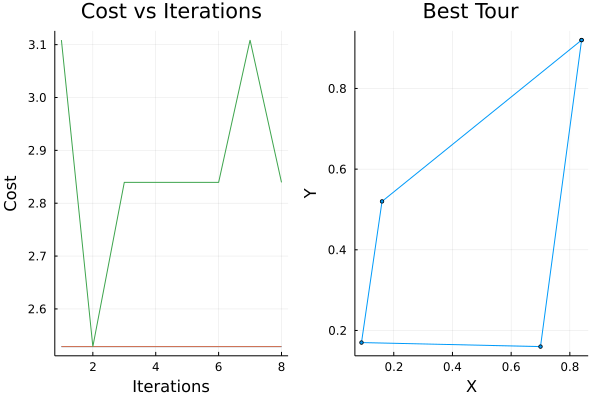

In [13]:
@time main_function(1)

Ant(32.56757019158397, [6, 12, 14, 4, 3, 2, 1, 8, 11, 9, 10, 13, 7, 5])  0.038714 seconds (194.87 k allocations: 9.002 MiB, 22.92% gc time)


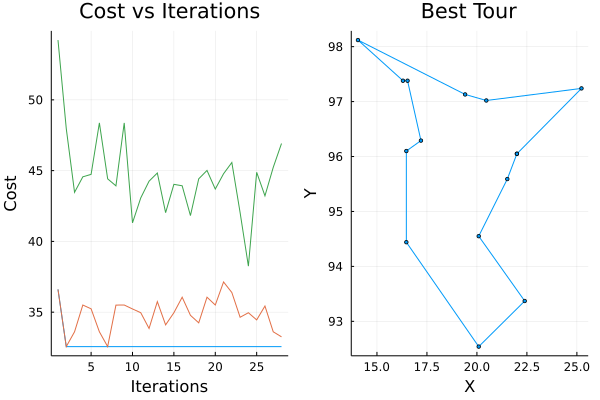

In [14]:
@time main_function(2)

Ant(427.4371931165062, [19, 41, 13, 4, 5, 9, 25, 14, 2, 24, 1, 6, 8, 3, 43, 7, 23, 48, 27, 46, 12, 47, 18, 17, 37, 44, 15, 45, 33, 39, 10, 30, 34, 50, 16, 21, 29, 20, 35, 36, 28, 31, 26, 22, 32, 11, 38, 49, 42, 40])  2.501158 seconds (13.05 M allocations: 744.209 MiB, 4.72% gc time)


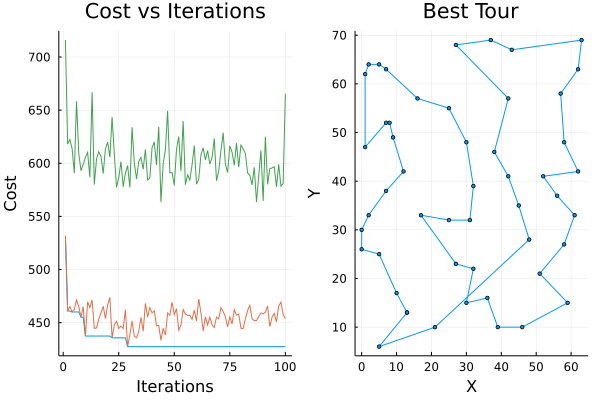

In [15]:
@time main_function(3)

Ant(22217.92353033262, [95, 13, 76, 33, 37, 5, 52, 78, 96, 39, 30, 48, 100, 71, 41, 14, 3, 43, 46, 29, 34, 83, 55, 12, 27, 86, 35, 62, 60, 77, 23, 98, 91, 45, 32, 11, 15, 17, 59, 74, 21, 72, 10, 84, 36, 99, 38, 24, 18, 79, 53, 88, 16, 22, 94, 70, 66, 65, 4, 26, 19, 75, 97, 56, 80, 31, 89, 42, 8, 92, 1, 63, 6, 49, 90, 47, 93, 28, 67, 58, 61, 51, 87, 9, 7, 57, 20, 25, 81, 69, 64, 40, 54, 2, 44, 50, 73, 68, 85, 82]) 33.415070 seconds (154.68 M allocations: 9.548 GiB, 4.35% gc time)


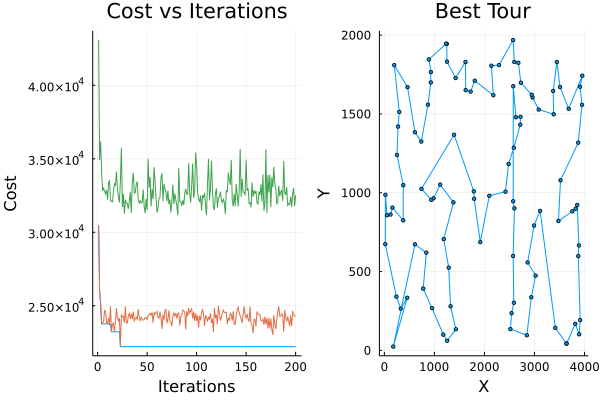

In [16]:
@time main_function(4)